<a href="https://colab.research.google.com/github/mssabahi/Machine_Learning/blob/master/ch_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Selecting the correct features:
* Reduces overfitting
* Improves accuracy
* Increases interpretability
* Reduces training time

# Feature selection methods
* Filter: Rank features based on statistical performance
* Wrapper: Use an ML method to evaluate performance
* Embedded: Iterative model training to extract features
* Feature importance: tree-based ML models

# Compare and contrast methods
![](https://drive.google.com/uc?id=1lqhqhr34v-1vSlwj49GSyLboSK9khxU4)

# Filter Method

Filter methods rank features based on their statistical performance while wrapper, embedded and tree-based methods use a machine learning model to evaluate performance.

## Correlation coefficient statistical tests
![](https://drive.google.com/uc?id=1MjIkfzMrxprPDj7jVdKdfL5Vmii8qoq0)

# Filter Functions

![](https://drive.google.com/uc?id=1c4CJq9KF3OtqLhzussWLhA_00t2szPk7)

# Wrapper methods 

1. Forward selection (LARS-least angle regression)
  * Starts with no features, adds one at a time
2. Backward elimination
  * Starts with all features, eliminates one at a time
3. Forward selection/backward elimination combination (bidirectional elimination)
4. Recursive feature elimination
   * RFECV (Recursive feature elimination with cross-validation to select the number of features.)
 




# Embeded Methods 
Embedded methods combine the qualities' of filter and wrapper methods. It's implemented by algorithms that have their own built-in feature selection methods. Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting

## 3 approaches:
1. Lasso Regression
2. Ridge Regression
3. ElasticNet

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.


**Elastic Net cost function**

![](https://drive.google.com/uc?id=1ENPvSoUfTh0Fbeym7YhOuAQSdRYSn5_-)


# Tree-based Feature Importance Methods


```
Random Forest --> sklearn.ensemble.RandomForestRegressor
Extra Trees --> sklearn.ensemble.ExtraTreesRegressor
After model fit --> tree_mod.feature_importances_

```



# Some Regression Functions Used for Feature Selections 




```
sklearn.svm.SVR                           support vector regression estimator
sklearn.feature_selection.RFECV           recursive feature elimination with cross-val
rfe_mod.support_                          boolean array of selected features
ref_mod.ranking_                          feature ranking, selected=1
sklearn.linear_model.LinearRegression     linear model estimator
sklearn.linear_model.LarsCV               least angle regression with cross-val
LarsCV.score                              r-squared score
LarsCV.alpha_                             estimated regularization parameter

```




# Excercises: 
## Filter and Wrapper Methods
Questions about reducing the dimensionality of a dataset are highly common in machine learning interviews. One way to reduce the dimensionality of a dataset is by only selecting relevant features in your dataset.

Here you'll practice a filter method on the diabetes DataFrame followed by 2 different styles of wrapper methods that include cross-validation. You will be using pandas, matplotlib.pyplot and seaborn to visualize correlations, process your data and apply feature selection techniques to your dataset.

The feature matrix with the dropped target variable column (progression) is loaded as X, while the target variable is loaded as y.


In [ ]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix with diabetes and a heatmap, then subset the features which have greater than 50% correlation.

In [ ]:
# Create correlation matrix and print it

diabetes = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/ML_Interview/Chapter_02/diabetes.csv')

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
cor = diabetes.corr()
print(cor)

                  age       sex       bmi  ...        s5        s6  progression
age          1.000000  0.173737  0.185085  ...  0.270777  0.301731     0.187889
sex          0.173737  1.000000  0.088161  ...  0.149918  0.208133     0.043062
bmi          0.185085  0.088161  1.000000  ...  0.446159  0.388680     0.586450
bp           0.335427  0.241013  0.395415  ...  0.393478  0.390429     0.441484
s1           0.260061  0.035277  0.249777  ...  0.515501  0.325717     0.212022
s2           0.219243  0.142637  0.261170  ...  0.318353  0.290600     0.174054
s3          -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697    -0.394789
s4           0.203841  0.332115  0.413807  ...  0.617857  0.417212     0.430453
s5           0.270777  0.149918  0.446159  ...  1.000000  0.464670     0.565883
s6           0.301731  0.208133  0.388680  ...  0.464670  1.000000     0.382483
progression  0.187889  0.043062  0.586450  ...  0.565883  0.382483     1.000000

[11 rows x 11 columns]


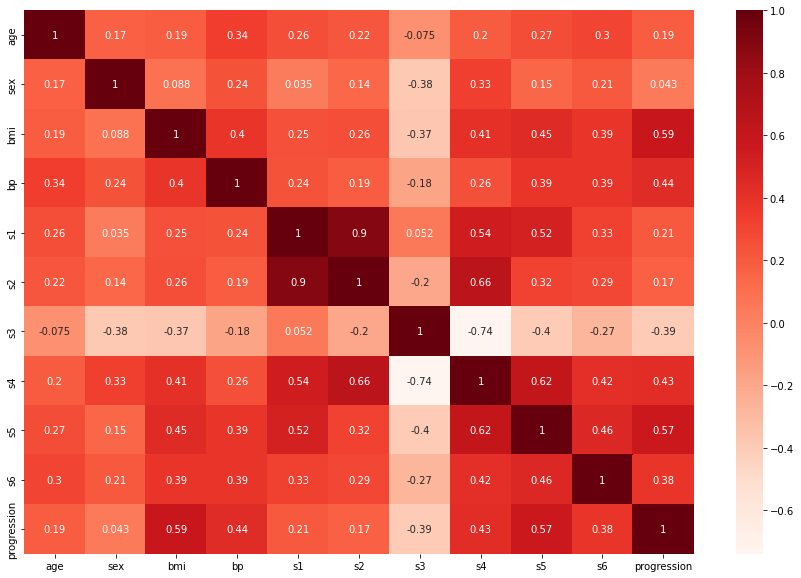

In [ ]:
# Step 1
# Correlation matrix heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Step 1 continue
# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > .5]
print(best_features)

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [ ]:
# Step 2
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

X = diabetes.drop(['progression'], axis='columns') #axis=1 is equavalent to axis='columns'
y = diabetes.progression

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X,y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)


[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [ ]:
# Drop the unimportant column found in step 2 from X and instantiate a LarsCV object and fit it to your data.
# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)
print(lars_mod.coef_)

0.4982900996498095
0.05226862285159154
[   0.          547.26566654  252.30372047 -390.44325522  243.76403539
  -36.86660641    0.          643.67630187   32.05042583]


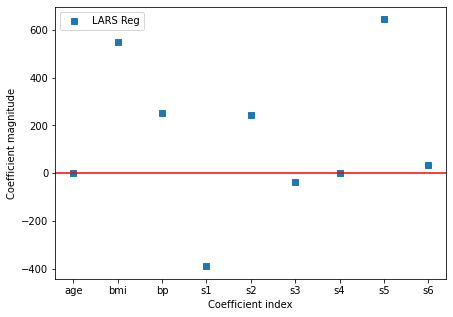

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(X.columns.to_list(), lars_mod.coef_, 's', label="LARS Reg")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()

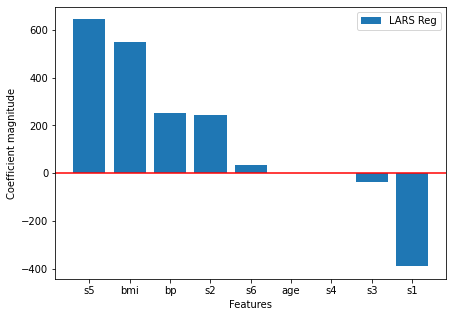

In [ ]:
# sort the features based on their importance
dic = dict(zip(np.array(X.columns), lars_mod.coef_))
dic_sort = sorted(dic.items(), key=lambda x:x[1], reverse=True) # reverse=True means descending order
xx = [x[0] for x in dic_sort]
yy = [x[1] for x in dic_sort]


plt.figure(figsize=(7, 5))
plt.bar(xx, yy,  label="LARS Reg")
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()

# Feature selection through feature importance
In the last exercise, the filter and wrapper methods were used to select features in machine learning. In this exercise, the feature selection methods is used with the built-in feature importance in tree-based machine learning algorithms on the diabetes DataFrame.

The feature matrix and target array are saved to your workspace as X and y, respectively.

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.         0.39961579 0.03085607 0.         0.00128948
 0.00700339 0.00417891 0.53899467 0.01806168]


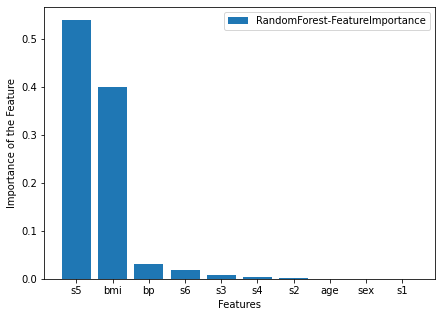

In [ ]:
# Import the correct function to instantiate a Random Forest regression model.
# Import
X = diabetes.drop(['progression'], axis='columns') #axis=1 is equavalent to axis='columns'
y = diabetes.progression

from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

# sort the features based on their importance
dic = dict(zip(np.array(X.columns), rf_mod.feature_importances_))
dic_sort = sorted(dic.items(), key=lambda x:x[1], reverse=True) # reverse=True means descending order
xx = [x[0] for x in dic_sort]
yy = [x[1] for x in dic_sort]

plt.figure(figsize=(7, 5))
plt.bar(xx, yy,  label="RandomForest-FeatureImportance")
plt.xlabel("Features")
plt.ylabel("Importance of the Feature")
# plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()


In [ ]:
# Import the correct function to instantiate an Extra Tree regression model.
# Fit the model and print feature importance.

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.05684854 0.03338495 0.26191421 0.11661371 0.04950582 0.04966422
 0.06280272 0.09039756 0.20442912 0.07443915]


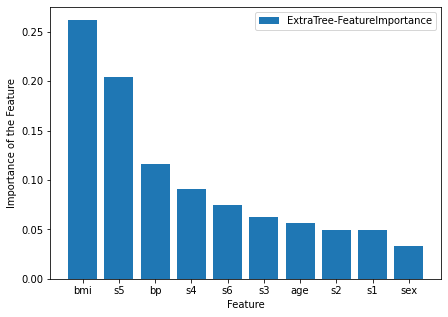

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)



# sort the features based on their importance
dic = dict(zip(np.array(X.columns), xt_mod.feature_importances_))
dic_sort = sorted(dic.items(), key=lambda x:x[1], reverse=True) # reverse=True means descending order
xx = [x[0] for x in dic_sort]
yy = [x[1] for x in dic_sort]

plt.figure(figsize=(7, 5))
plt.bar(xx, yy,  label="ExtraTree-FeatureImportance")
plt.xlabel("Feature")
plt.ylabel("Importance of the Feature")
# plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()



# Differences betwee Random Forest and Extra Tree Methods:

* Random forest uses bootstrap replicas, that is to say, it subsamples the input data with replacement, whereas Extra Trees use the whole original sample. In the Extra Trees sklearn implementation there is an optional parameter that allows users to bootstrap replicas, but by default, it uses the entire input sample. This may increase variance because bootstrapping makes it more diversified.
* Another difference is the selection of cut points in order to split nodes. Random Forest chooses the optimum split while Extra Trees chooses it randomly. However, once the split points are selected, the two algorithms choose the best one between all the subset of features. Therefore, Extra Trees adds randomization but still has optimization.

# Lasso regularization
In the previous lesson, you covered an important aspect of machine learning interview questions by practicing various feature selection techniques.

In this exercise, you will build on your knowledge of feature selection and perform all the steps in the machine learning pipeline by trying out Lasso Regularization.

All relevant packages have been imported for you, as well as the feature matrix X and target variable y. You've come a long way!

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

2924.5859832897386


#Ridge regularization

Lasso uses the L1 norm corresponding to the penalty parameter and the absolute value of the coefficients. Ridge regression performs L2 regularization, also known as L2-norm, which adds a penalty term to ordinary least squares using the penalty parameter and the sum of the squared coefficients.



In [ ]:
# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))


2970.874355984401


# Feature engineering

* Extracts additional information from the data
* Creates additional relevant features
* One of the most e(ective ways to improve predictive models

# Benefits of feature engineering
* Increased predictive power of the learning algorithm
* Makes your machine learning models perform even better

# Types of feature engineering
* Indicator variables
* Interaction features
* Feature representation

## Indicator variables
* Threshold indicator
 * age: high school vs college
* Multiple features
 * used as a .ag
* Special events
 * black Friday
 * Christmas
* Groups of classes
 * website tra)c paid .ag
   * Google adwords{4}}
   * Facebook ads

## Interaction features
* Sum
* Diference
* Product
* Quotient
* Other mathematical combos

## Feature representation
* Datetime stamps
 * Day of week
 * Hour of day
* Grouping categorical levels into 'Other'
* Transform categorical to dummy variables
 * (k - 1) binary columns

## Different categorical levels
* Training data:
 * model trained with [red, blue, green]
* Test data:
 * model test with [red, green, yellow]
 * additional color not seen in training
 * one color missing
* Robust one-hot encoding

# Feature engineering functions
**Function returns**


```
sklearn.linear_model.LogisticRegression                    logistic regression
sklearn.model_selection.train_test_split                   train/test split function
sns.countplot(x='Loan Status', data=data)                  bar plot
df.drop(['Feature 1', 'Feature 2'], axis=1)                drops list of features
df["Loan Status"].replace({'Paid': 0, 'Not Paid': 1})      Loan Status as integers
pd.get_dummies()                                           k - 1 binary features
sklearn.metrics.accuracy_score(y_test, predict(X_test))    model accurac
```




# Logistic regression baseline classifier

In the last 2 lessons, you learned how valuable feature selection is in the context of machine learning interviews. Another set of common questions you should expect in a machine learning interview pertain to feature engineering, and how they help improve model performance.

In this exercise, you'll engineer a new feature on the loan_data dataset from Chapter 1, compare the accuracy score of Logistic Regression models on the dataset before and after feature engineering by comparing test labels with the predicted values of the target variable Loan Status.



In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/ML_Interview/Chapter_02/LoansTrainingSetReduced.csv')
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,728.0,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,Long Term,733.0,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,Short Term,724.0,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,Short Term,740.0,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,Long Term,686.0,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


# Iterative imputation

In [ ]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_iterDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

In [ ]:
# Replace load_data columns with loans_imp_iter
for i in loans_imp_iterDF.columns:
  loan_data[i] = loans_imp_iterDF[i]

In [ ]:
# Apply LGReg to only numeric data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# loan_data_num = loan_data.select_dtypes(np.number)
loan_data_cat = loan_data.select_dtypes(np.object)

# Create X matrix and y array
# X = loan_data.drop("Loan Status", axis=1)
X = loans_imp_iterDF
y = loan_data_cat["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

0.7178795036178908


In [ ]:
# Convert Annual Income to monthly, and derive the ratio of Monthly Debt to monthly_income and store it in dti_ratio.
# Convert income: monthly_income
monthly_income = loan_data["Annual Income"]/12

# Make engineered feature, remove features used
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,dti_ratio
0,Charged Off,12232.0,Short Term,728.0,1.0,Rent,DebtConsolidation,18.0,10.000000,12.0,0.0,6762.0,7946.0,0.0,0.0,20.000172
1,Charged Off,25014.0,Long Term,733.0,10.0,Mortgage,DebtConsolidation,26.7,34.756537,14.0,0.0,35706.0,77961.0,0.0,0.0,13.200015
2,Charged Off,16117.0,Short Term,724.0,9.0,Mortgage,HomeImprovements,16.7,32.000000,11.0,1.0,11275.0,14815.0,1.0,0.0,24.700089
3,Charged Off,11716.0,Short Term,740.0,3.0,Rent,DebtConsolidation,10.0,24.479370,21.0,0.0,7009.0,43533.0,0.0,0.0,34.799333
4,Charged Off,9789.0,Long Term,686.0,10.0,Mortgage,HomeImprovements,16.7,25.000000,13.0,1.0,16913.0,19553.0,1.0,0.0,12.859860


In [ ]:
# Convert the target variable to numerical values and replace categorical features with dummy values.


# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})

# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data, drop_first=True)

loan_data.head()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,dti_ratio,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_CarPurchase,Purpose_DebtConsolidation,Purpose_EducationalExpenses,Purpose_HomeImprovements,Purpose_HomePurchase,Purpose_MajorPurchase,Purpose_MedicalBills,Purpose_Moving,Purpose_Other,Purpose_RenewableEnergyPurchase,Purpose_Vacation,Purpose_Wedding
0,1,12232.0,728.0,1.0,18.0,10.000000,12.0,0.0,6762.0,7946.0,0.0,0.0,20.000172,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,25014.0,733.0,10.0,26.7,34.756537,14.0,0.0,35706.0,77961.0,0.0,0.0,13.200015,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,16117.0,724.0,9.0,16.7,32.000000,11.0,1.0,11275.0,14815.0,1.0,0.0,24.700089,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,11716.0,740.0,3.0,10.0,24.479370,21.0,0.0,7009.0,43533.0,0.0,0.0,34.799333,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,1,9789.0,686.0,10.0,16.7,25.000000,13.0,1.0,16913.0,19553.0,1.0,0.0,12.859860,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
loan_data_cat.Purpose.value_counts()

DebtConsolidation          70447
Other                       7767
HomeImprovements            5206
BusinessLoan                1576
CarPurchase                 1196
MedicalBills                 955
HomePurchase                 559
Vacation                     536
MajorPurchase                344
Moving                       124
Wedding                       99
EducationalExpenses           92
RenewableEnergyPurchase        9
Name: Purpose, dtype: int64

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# loan_cat = cat_encoder.fit_transform(loan_data_cat)
# print(loan_cat.toarray().shape)
# print(loan_cat)


In [ ]:
# # Fit and predict a Logistic Regression on loans_dti and evaluate the trained model's accuracy score.

# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()

# loans_dti_01 = pd.DataFrame(data=scalar.fit_transform(loans_imp_iterDF), columns=loans_imp_iterDF.columns.to_list())

# loans_dti_02 = pd.get_dummies(loan_data_cat)

# loans_dti = pd.concat([loans_dti_01, loans_dti_02], axis=1)
# loans_dti.head()

In [ ]:
# Create X matrix and y array
X = loan_data.drop("Loan Status", axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

0.7179169947137555


# Ensemble learning techniques
* Bootstrap Aggregation
* Boosting
* Model stacking

# Bagging (Bootstrap aggregation)
* Bootstrapped samples
  * Subset selected with replacement
  * Same row of data may be chosen
* Model built for each sample
* Average the output
* Reduces variance

![](https://drive.google.com/uc?id=1MGWNBQw-7CJsGZLa-efl0e7dlDrOziK5)



#Boosting
* Multiple models built sequentially
* Incorrect predictions are weighted
* Reduces bias

![](https://drive.google.com/uc?id=1vvRZ6pQVLl1VGt6Bt9Wuw6uDDYRRqnkf)

# Model stacking
* Model 1 predictions
* Model 2 predictions...
* Model N predictions
* Stack for highest accuracy model
  * Uses base model (Model N) predictions
as input to 2nd level model

![](https://drive.google.com/uc?id=1YGbg7FRZzl80ZsNXc9G2JqBJM5z6l_HT)


#Vecstack package
https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e

```
# import modules

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from vecstack import stacking

# Create list: stacked_models

stacked_models = [BaggingClassifier(n_estimators=25, random_state=123), AdaBoostClassifier(n_estimators=25, random_state=123)]

# Stack the models: stack_train, stack_test

stack_train, stack_test = stacking(stacked_models, X_train, y_train, X_test, regression=False, mode='oof_pred_bag',
needs_proba=False, metric=accuracy_score, n_folds=4, stratified=True, shuffle=True, random_state=0, verbose=2)

# Initialize and fit 2nd level model

final_model = XGBClassifier(random_state=123, n_jobs=-1, learning_rate=0.1, n_estimators=10, max_depth=3)
final_model_fit = final_model.fit(stack_train, y_train)

# Predict: stacked_pred

stacked_pred = final_model.predict(stack_test)

# Final prediction score

print('Final prediction score: [%.8f]' % accuracy_score(y_test, stacked_pred))
```





# Ensemble functions


```
Bootstrap aggregation              sklearn.ensemble.BaggingClassifier()
Boosting                           sklearn.ensemble.AdaBoostClassifier()
XGBoost                            xgboost.XGBClassifier()
```



# Bagging vs boosting
![](https://drive.google.com/uc?id=1ccanJOBQvME2HfQ5x0hu7b2MA069SUW-)

# Ensemble techniques

* Boosting methods decrease model bias which, at the same time, helps increase variance to ,nd that sweet spot for best model generalization.

* Boosting decreases model bias, which may or may not increase the predictive abilities of a classifier.

* Bagging decreases model variance.

* Model stacking takes the predictions from individual models and combines them to create a higher accuracy model.

# Bootstrap aggregation (bagging)
In the last lesson, you got a small taste of classification models by applying logistic regression on data with engineered features. In machine learning interviews, it's sometimes worthwhile to know about ensemble models since they combine weak learners to create a strong learner that improves model accuracy.

In this exercise, you will start off by applying a bagging classifier which uses a sampling technique, with replacement, to maintain randomness and reduce overfitting. You will be using functions from the sklearn.ensemble module which you saw in the video exercise

In [ ]:
# Instantiate bootstrap aggregation model
# Instantiate a bagging classifier by calling the appropriate function as introduced in the video exercise and set the appropriate argument for 50 estimators.
from sklearn.ensemble import BaggingClassifier
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

In [ ]:
# Fit
bgm = bagged_model.fit(X_train, y_train)

In [ ]:
# Predict
bagged_pred = bgm.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bagged_pred))

0.7199040227945863


# Boosting
In the last exercise, you started off with ensemble techniques by using bagging. In a machine learning interview, you might be prompted to try out or discuss more than one ensemble technique.

Here, you'll practice Boosting which uses all data to train each learner, but instances that were misclassified by the previous learners are given more weight so that subsequent learners give more focus to them during training. This results in a model with decreased bias.

In [ ]:
# Instantiate an AdaBoost boosting classifier and set the appropriate argument to generate 50 estimators
from sklearn.ensemble import AdaBoostClassifier
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

In [ ]:
# Fit
boosted_model_fit = boosted_model.fit(X_train, y_train)

In [ ]:
# Predict
boosted_pred = boosted_model_fit.predict(X_test)

In [ ]:
# Print model accuracy
print(accuracy_score(y_test, boosted_pred))

0.7311888426498706


# XG Boost
XGBoost is an optimized distributed gradient boosting package that is "taking over the world!".

The argument learning_rate=0.1 specifies the size of the step to take in each iteration while searching for the global minimum and max_depth controls the size (depth) of the decision trees, here 3.

In [ ]:
# Instantiate an XGBoost boosting classifier and set the appropriate argument to generate 10 estimators.
from xgboost import XGBClassifier

# Instantiate
xgb = XGBClassifier(n_estimators=10, random_state=123, learning_rate=0.1, max_depth=3)


In [ ]:
# Fit
xgb = xgb.fit(X_train, y_train)

In [ ]:
# Predict
xgb_pred = xgb.predict(X_test)

In [ ]:
# Print accuracy score
print('Final prediction score: [%.8f]' %accuracy_score(y_test, xgb_pred))

Final prediction score: [0.72646496]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier()
n_estimators = range(16, 40, 2)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)

grid_result = grid_search.fit(X_train, y_train)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.514729 using {'n_estimators': 38}
-0.536694 (0.002002) with: {'n_estimators': 16}
-0.532198 (0.002097) with: {'n_estimators': 18}
-0.528656 (0.002116) with: {'n_estimators': 20}
-0.525725 (0.002178) with: {'n_estimators': 22}
-0.523387 (0.002144) with: {'n_estimators': 24}
-0.521369 (0.002194) with: {'n_estimators': 26}
-0.519763 (0.002186) with: {'n_estimators': 28}
-0.518364 (0.002177) with: {'n_estimators': 30}
-0.517239 (0.002173) with: {'n_estimators': 32}
-0.516274 (0.002166) with: {'n_estimators': 34}
-0.515431 (0.002125) with: {'n_estimators': 36}
-0.514729 (0.002090) with: {'n_estimators': 38}


The results may vary given the stochastic nature of the algorithm or evaluation procedure,  
 or differences in numerical precision. We should consider running the example a few times and compare the average outcome.



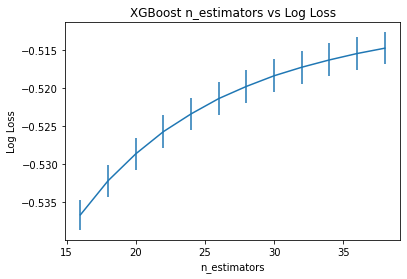

In [ ]:
from matplotlib import pyplot 
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')
print('The results may vary given the stochastic nature of the algorithm or evaluation procedure, \
 \n or differences in numerical precision. We should consider running the example a few times and compare the average outcome.\n')

In [ ]:
print('Final prediction score: [%.8f]' %accuracy_score(y_test, grid_search.predict(X_test)))

Final prediction score: [0.73047651]


# Stacked Generalization
Stacked Generalization or “Stacking” for short is an ensemble machine learning algorithm.

It involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.

# Stacking addresses the question:

Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?
The approach to this question is to use another machine learning model that learns when to use or trust each model in the ensemble.

Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).
Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

# Architecture of a stacking model

The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model.

* **Level-0 Models (Base-Models):** Models fit on the training data and whose predictions are compiled. Base models use a diverse range of models that make different assumptions about the prediction task.
* **Level-1 Model (Meta-Model):** Model that learns how to best combine the predictions of the base models.

### Stacking Model- Step 1
The meta-model is trained on the predictions made by base models on out-of-sample data. That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model.

The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification.

### Stacking Model- Step 2

The most common approach to preparing the training dataset for the meta-model is via **k-fold cross-validation** of the base models, where the **out-of-fold predictions** are used as the basis for the training dataset for the meta-model.

### Stacking Model- Step 3 

Once the training dataset is prepared for the meta-model, the meta-model can be trained in isolation on this dataset, and the base-models can be trained on the entire original training dataset.

# Stacking for Classification


### 1- Get a list of models to evaluateEach model will be evaluated using repeated k-fold cross-validation.



In [ ]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

### 2- Evaluation of the models: The evaluate_model() function below takes a model instance and returns a list of scores from three repeats of stratified 10-fold cross-validation.

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
  

# Application of a Stacking Model:

>lr 0.716 (0.000)
>knn 0.667 (0.004)
>cart 0.648 (0.005)
>svm 0.716 (0.000)
>bayes 0.428 (0.004)


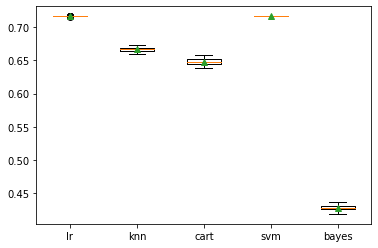

In [ ]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
# use the previous X_train and y_train

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

A box-and-whisker plot is then created comparing the distribution accuracy scores for each model, allowing us to clearly see that Lr and SVM perform better on average than KNN, CART, and Bayes.

Next, we can try to combine these five models into a single ensemble model using stacking.

We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.

The get_stacking() function below defines the StackingClassifier model by first defining a list of tuples for the five base models, then defining the logistic regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

>lr 0.717 (0.000)
>knn 0.667 (0.003)
>cart 0.652 (0.003)
>svm 0.717 (0.000)
>bayes 0.428 (0.003)
>stacking 0.641 (0.072)


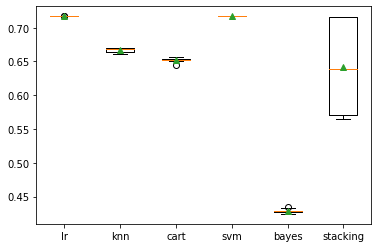

In [66]:
from sklearn.ensemble import StackingClassifier

def get_stacking():

	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
 
	# define meta learner model
	level1 = LogisticRegression()
 
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model


# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Prediction
We can fit and use it to make predictions on the test data just like any other model.

In [67]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression()

stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
stack_model.fit(X_train, y_train)
# make a prediction for one example
y_pred = stack_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7187792899186444
